## Project : Credit Card Fraud Detection

##### About Dataset
Context

The Credit Card Fraud Detection project is used to identify whether a new transaction is fraudulent or not by modeling past credit card transactions with the knowledge of the ones that turned out to be fraud.We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.

We are using the datasets provided by Kaggle. This data set includes all transactions recorded over the course of two days. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons.

Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### READING DATASET :

In [2]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\CC1.csv")

In [3]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,NaN,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


###### NULL VALUES:

In [5]:
# Cheking missing values in columns
df_missing_values = df.isnull().sum()
df_missing_values

Unnamed: 0    0
Time          0
V1            1
V2            0
V3            3
V4            0
V5            2
V6            2
V7            3
V8            3
V9            3
V10           5
V11           1
V12           1
V13           1
V14           4
V15           1
V16           7
V17           3
V18           4
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

###### There are present null values in the dataset. And 1 one unnamed colunm which is show sl.no which is not required to Analysis porpose, so we drop the column

In [6]:
# Fill null value by the Ffill methot
df.V1.fillna(method='ffill', inplace=True)
df.V3.fillna(method='ffill', inplace=True)
df.V5.fillna(method='ffill', inplace=True)
df.V6.fillna(method='ffill', inplace=True)
df.V7.fillna(method='ffill', inplace=True)
df.V8.fillna(method='ffill', inplace=True)
df.V9.fillna(method='ffill', inplace=True)
df.V11.fillna(method='ffill', inplace=True)
df.V10.fillna(method='ffill', inplace=True)
df.V12.fillna(method='ffill', inplace=True)
df.V13.fillna(method='ffill', inplace=True)
df.V14.fillna(method='ffill', inplace=True)
df.V15.fillna(method='ffill', inplace=True)
df.V16.fillna(method='ffill', inplace=True)
df.V17.fillna(method='ffill', inplace=True)
df.V18.fillna(method='ffill', inplace=True)


In [7]:
# Dropping the Unnnamed column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [8]:
# Now Again Cheking missing values in columns
df_missing_values = df.isnull().sum()
df_missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Now the Data is clean & there is no null

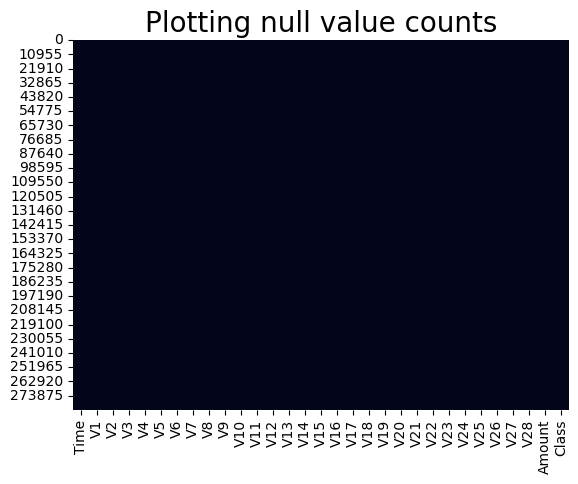

In [9]:
#visualization of null values Checking 
sns.heatmap(df.isnull(),cbar=False)
plt.title('Plotting null value counts',fontsize=20)
plt.show()

### INFORMATION

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### DESCRIPTIVE STATISTICS

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.685037e-06,1.958697,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-2.602287e-06,1.516259,-48.325589,-0.890365,0.179845,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.225267e-06,1.380246,-113.743307,-0.691597,-0.054336,0.611914,34.801666
V6,284807.0,-9.212221e-06,1.332260,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-2.877341e-06,1.237095,-43.557242,-0.554089,0.040103,0.570436,120.589494
V8,284807.0,-7.359345e-07,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,1.023261e-05,1.098637,-13.434066,-0.643098,-0.051427,0.597164,15.594995


In [12]:
df.shape

(284807, 31)

###### there are 284807 rows and 31 columns.

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

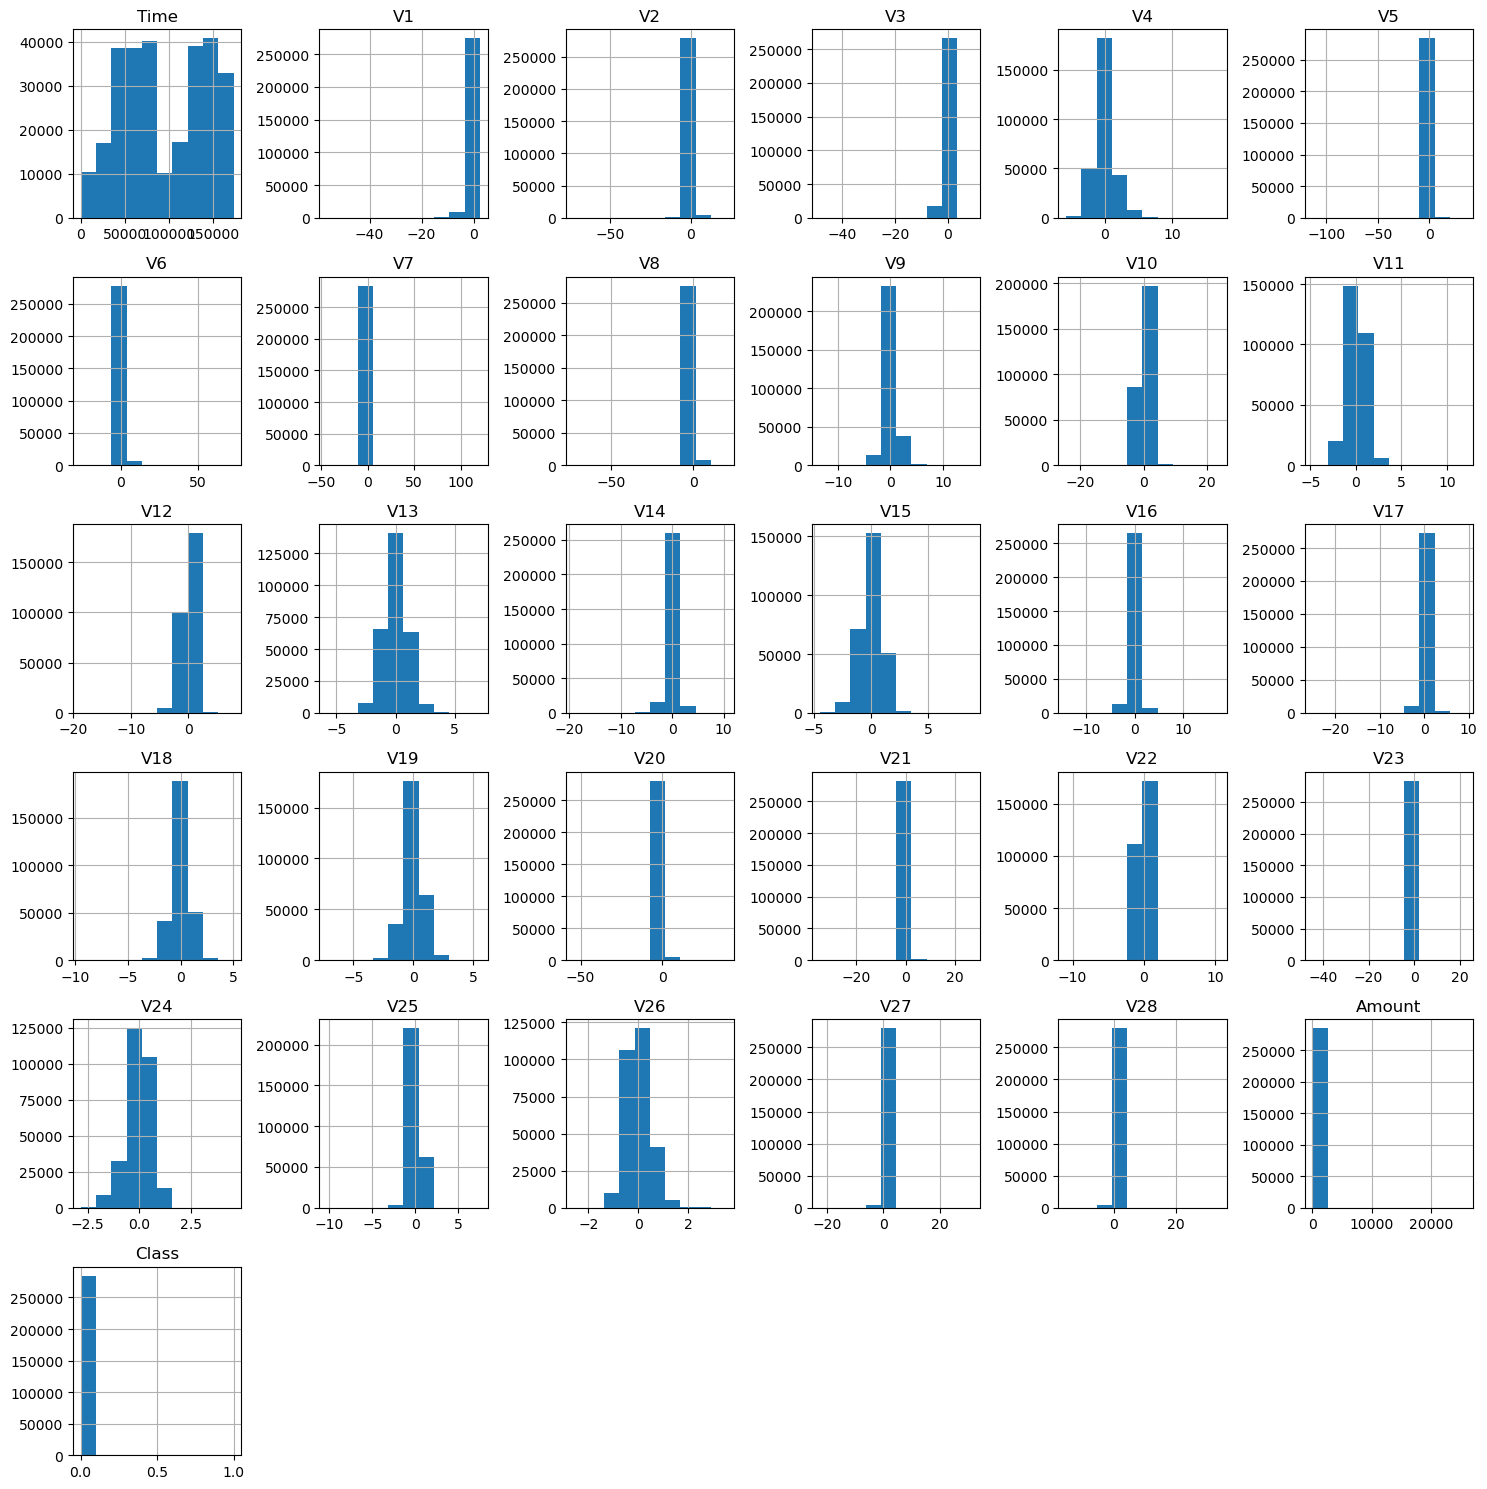

In [14]:
# Freq distribution of all columns
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

#### CORRELATION

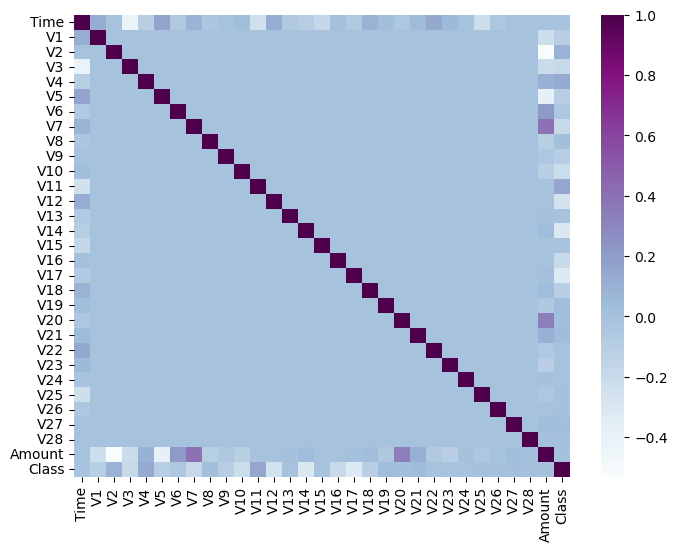

In [15]:
plt.figure(figsize=(8,6))
corr=df.corr()
sns.heatmap(corr,cmap='BuPu')
plt.show()

#### FRAUD CASES AND GENUINE CASES

In [16]:
fraud_cases=len(df[df['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [17]:
non_fraud_cases=len(df[df['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [18]:
fraud=df[df['Class']==1]

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
Non_fraud=df[df['Class']==0]

In [21]:
Non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

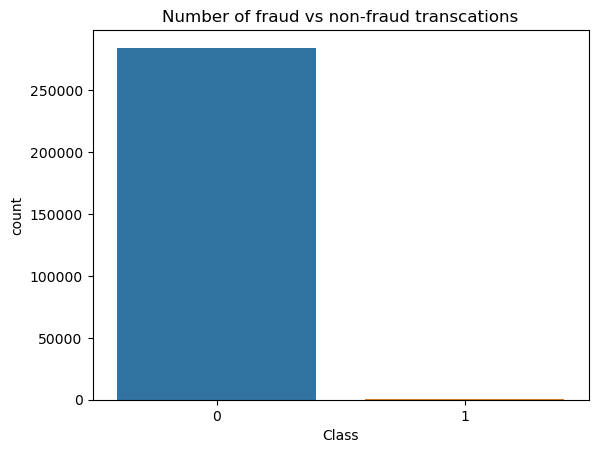

In [22]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

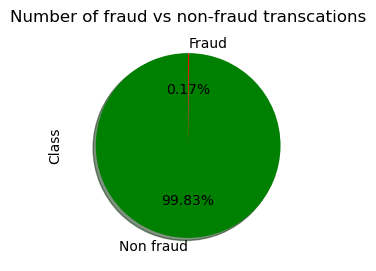

In [23]:
#Visualization
df['Class'].value_counts().plot(kind='pie',
                                figsize=(5,3),
                                autopct=('%1.2f%%'),
                                startangle=90,
                                shadow=('true'), 
                                colors=['green','red'],
                                labels=['Non fraud', 'Fraud'])
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

In this pie chart we can see that .17% Fraud transcation and 99.83% Non Fraud transcation


## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.


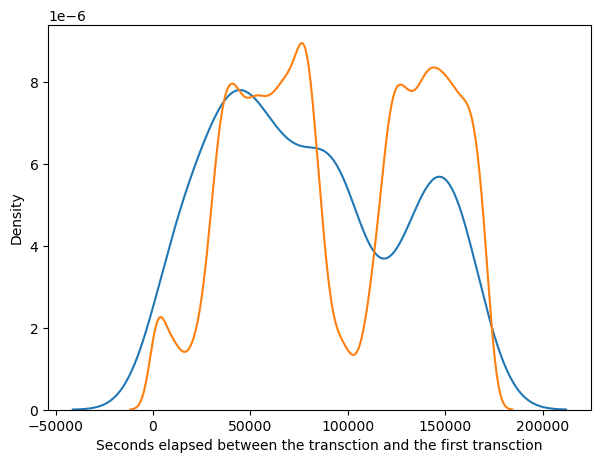

In [24]:
# Distribution plot
plt.figure(figsize=(7,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(Non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

###### Analysis

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.


In [25]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

#### Distribution of classes with amount

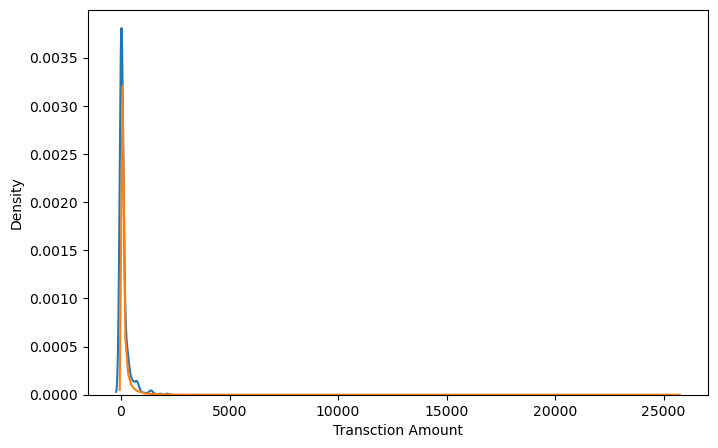

In [26]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(Non_fraud['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

###### Analysis

We can see that the fraud transctions are mostly densed in the lower range of amount, whereas the non-fraud transctions are spreaded throughout low to high range of amount.


#### Handling Imbalanced Dataset

In [27]:
# Undersampling
# Oversampling

#### Undersampling

In [28]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [29]:
normal.shape

(284315, 30)

In [30]:
fraud.shape

(492, 30)

In [31]:
normal_sample=normal.sample(n=492)

In [32]:
normal_sample.shape

(492, 30)

In [33]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [34]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [35]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.251329,-0.163846,-0.073328,0.277459,0.365329,1.118584,-0.384923,0.348148,0.515032,-0.058311,...,-0.340896,-0.856067,-0.111948,-1.704500,0.434804,0.302282,-0.011139,-0.015184,9.99,0
1,2.031643,-0.282990,-1.230355,0.237969,-0.096348,-0.669931,-0.093098,-0.012535,0.645312,0.300498,...,-0.279179,-0.808847,0.320876,-0.457443,-0.376321,0.211532,-0.086631,-0.078832,1.98,0
2,-0.499234,0.385912,1.098922,-1.325808,0.204083,-0.683290,0.498102,0.020622,0.178150,-0.669892,...,-0.126877,-0.435896,-0.009115,-0.422396,-0.123254,0.774089,0.155491,0.064651,38.42,0
3,-0.899601,-0.259367,-0.239717,-2.245525,-0.599738,-0.608913,0.418777,0.355891,0.995942,-1.656520,...,0.209523,0.755558,0.434820,-0.298226,0.064643,-0.663110,-0.013049,-0.131994,133.00,0
4,2.240399,-1.504643,-0.808260,-1.653106,-1.318745,-0.271010,-1.372450,0.039233,-1.236260,1.746986,...,-0.117736,0.067241,0.289275,0.719293,-0.300028,-0.231317,0.006049,-0.050333,19.60,0


In [36]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                 random_state=101)

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1 = log.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred1)

0.9512195121951219

In [42]:
accuracy_score(y_test,y_pred1)

0.9512195121951219

In [43]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [44]:
precision_score(y_test,y_pred1)

0.9649122807017544

In [45]:
precision_score(y_test,y_pred1)

0.9649122807017544

In [46]:
recall_score(y_test,y_pred1)

0.9322033898305084

In [47]:
f1_score(y_test,y_pred1)

0.9482758620689654

In [48]:
f1_score(y_test,y_pred1)

0.9482758620689654

#### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred2 = dt.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred2)

0.9105691056910569

In [52]:
precision_score(y_test,y_pred2)

0.8870967741935484

In [53]:
recall_score(y_test,y_pred2)

0.9322033898305084

In [54]:
f1_score(y_test,y_pred2)

0.9090909090909092

#### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred3 = rf.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred3)

0.9512195121951219

In [58]:
precision_score(y_test,y_pred3)

0.9732142857142857

In [59]:
recall_score(y_test,y_pred3)

0.923728813559322

In [60]:
f1_score(y_test,y_pred3)

0.9478260869565216

In [61]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [62]:
final_data

,Models,ACC
0,LR,95.121951
1,DT,91.056911
2,RF,95.121951


<AxesSubplot:xlabel='Models', ylabel='ACC'>

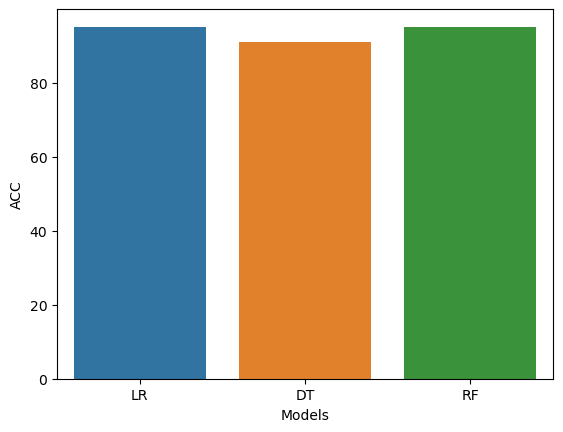

In [63]:
sns.barplot(final_data['Models'],final_data['ACC'])

#### Oversampling

In [64]:
X = df.drop('Class',axis=1)
y = df['Class']

In [65]:
X.shape

(284807, 29)

In [66]:
y.shape

(284807,)

In [67]:
!pip install imblearn

In [68]:
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

In [69]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [70]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

#### Logistic Regression

In [72]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred1 = log.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred1)

0.9590067354870478

In [75]:
precision_score(y_test,y_pred1)

0.9789255895708218

In [76]:
recall_score(y_test,y_pred1)

0.9383775624824487

In [77]:
f1_score(y_test,y_pred1)

0.9582228116710876

#### Decision Tree Classifier

In [78]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred2 = Dt.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred2)

0.9983556970261858

In [81]:
precision_score(y_test,y_pred2)

0.9975119583691062

In [82]:
recall_score(y_test,y_pred2)

0.9992101937657961

In [83]:
f1_score(y_test,y_pred2)

0.9983603538829802

#### Random Forest Classifier

In [84]:
Rf =RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
y_pred3 = Rf.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred3)

0.999903276295658

In [87]:
precision_score(y_test,y_pred3)

0.9998069735202766

In [88]:
recall_score(y_test,y_pred3)

1.0

In [89]:
f1_score(y_test,y_pred3)

0.9999034774444338

In [90]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [91]:
final_data

,Models,ACC
0,LR,95.900674
1,DT,99.835570
2,RF,99.990328


<AxesSubplot:xlabel='Models', ylabel='ACC'>

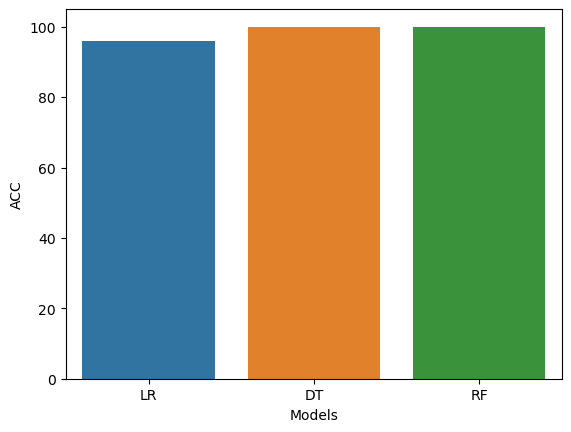

In [92]:
sns.barplot(final_data['Models'],final_data['ACC'])

#### Summary

###### After performing several models, we have seen that in the balanced dataset with SMOTE technique the  RF model has good ROC score and also high Recall. Hence, we can go with the RFmodel here. It is also easier to interpret and explain to the business.